# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

### Iris Dataset

In [2]:
path_to_repo = '/Users/ruben/repo/personal/ga/DAT-23-NYC/'

In [3]:
column_headers = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
data = pd.read_csv(path_to_repo + 'data/iris/iris.csv', header=None, names=column_headers)
data.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


###Classifying setosas
Let's add a binary label: setosa or not setosa?

In [4]:
data["setosa"] = data.species == "setosa"

Let's try to predict if it's a setosa, based on just two features.

In [5]:
features = ['sepal_width', 'sepal_length']
X, y = data[features], data.setosa

In [6]:
model = LogisticRegression()
cross_val_score(model, X, y, cv=10).mean()

0.9933333333333334

###Predictions
That seems to work well. Let's try out some predictions.

In [7]:
model.fit(X, y)
print model.predict(X)[:5]  # this will give you True or False
print model.predict_proba(X)[:5]  # this will give you the probability

[ True  True  True  True  True]
[[ 0.10678679  0.89321321]
 [ 0.35021525  0.64978475]
 [ 0.12794251  0.87205749]
 [ 0.14581086  0.85418914]
 [ 0.05871329  0.94128671]]


Note that each prediction gives a probability for each class: not setosa, yes setosa. We want the latter.

In [8]:
y_pred = np.array(zip(*model.predict_proba(X))[1])
y_pred[:10]

array([ 0.89321321,  0.64978475,  0.87205749,  0.85418914,  0.94128671,
        0.95163009,  0.95124094,  0.87788572,  0.81229292,  0.73479813])

### Model performance

In [9]:
for metric in ["accuracy", "precision", "recall", "f1", "roc_auc"]:
    print "%-10s: %.4f" % (metric, cross_val_score(model, X, y, cv=10, scoring=metric).mean())

accuracy  : 0.9933
precision : 1.0000
recall    : 0.9800
f1        : 0.9889
roc_auc   : 1.0000


- A _precision_ of 100% means that all the ones we thought were setosas, we're indeed correct. We were very _precise_ in calling them out. In the extreme, we would only predict one positive of which we are absolutely sure.
- A _recall_ or _hit rate_ of 100% means that we called out all the setosas in the dataset. In the extreme, we would always predict positive to make sure we did not miss anything.

Let's try to compute those ourselves (expect for `roc_auc`).

In [10]:
scores = []
for i in xrange(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)
    y_pred = model.fit(X_train, y_train).predict(X_test)
    scores.append(dict(
        accuracy=(y_test == y_pred).mean(),
        precision=(y_test[y_pred] == y_pred[y_pred]).mean(),
        recall=(y_test[y_test.values] == y_pred[y_test.values]).mean()))
    scores[-1]['f1'] = 2 * scores[-1]['precision'] * scores[-1]['recall'] / \
        (scores[-1]['precision'] + scores[-1]['recall'])
scores = pd.DataFrame(scores)
scores.mean()

accuracy     0.991333
f1           0.986529
precision    1.000000
recall       0.974443
dtype: float64

###Decision boundaries
Let's try to see if we could draw a decision boundary between the flowers. 

Note that for linear regression, the probability $P$ is given by

$$P = \frac{1}{1 + e^{-\big(\alpha + \beta_1 x_1 + \beta_2 x_2\big)}}$$

In classification, we usually round $P$ to 0 or 1, so with the cut-off at 1/2. 

But $P = 1/2$ if and only if

$$\alpha + \beta_1 x_1 + \beta_2 x_2 = 0$$

which we could rewrite as the linear line:

$$x_2 = -\frac{\alpha + \beta_1 x_1}{\beta_2}$$

Let's draw it!

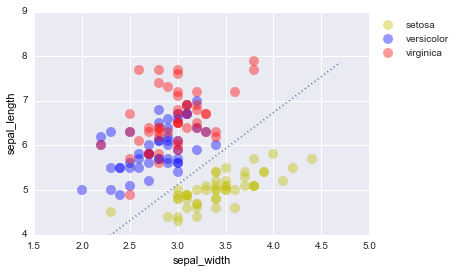

In [11]:
x1, x2 = features
colors = list("rby")

# Plot the flowers with color labels
for spec in data.species.unique():
    data_spec = data[data.species == spec]
    plt.scatter(data_spec[x1], data_spec[x2], label=spec, c=colors.pop(),
                linewidths=0, s=100, alpha=.4)
    
# draw the decision boundary
boundary_x1 = np.array([data[x1].min() - .3, data[x1].max() + .3])
boundary_x2 = -(model.intercept_ + model.coef_[0, 0] * boundary_x1) / model.coef_[0, 1]
f = plt.plot(boundary_x1, boundary_x2, ':')
    
f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))
f = plt.xlabel(x1), plt.ylabel(x2), plt.ylim(4, 9)

###More features, more labels
- Obviously, we could add more features to the $X$
- We could also add more classes to $y$

In [12]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X, y = data[features], data.species
model = LogisticRegression()
cross_val_score(model, X, y, cv=10).mean()

0.95333333333333337

In [13]:
model.fit(X, y)
print model.predict(X)[:5]  # this gives the predicted labels
print model.predict_proba(X)[:5]  # this gives the probabilties per label

['setosa' 'setosa' 'setosa' 'setosa' 'setosa']
[[  8.79681649e-01   1.20307538e-01   1.08131372e-05]
 [  7.99706325e-01   2.00263292e-01   3.03825365e-05]
 [  8.53796795e-01   1.46177302e-01   2.59031285e-05]
 [  8.25383127e-01   1.74558937e-01   5.79356669e-05]
 [  8.97323628e-01   1.02665167e-01   1.12050036e-05]]


<hr>
## Exercises

- Make a classifier for virginicas using logistic regression (i.e., only predicting 1 for verginicas and 0 otherwise), **only** using petal's width and length
- Train and test of the model using cross validation
- What is a good baseline for accuracy (i.e., how would the naive classifier score)?
- What is the model's precision, recall, and F1 score, aside from its accuracy?
- (\*) What is the model's AUC (Area Under the ROC Curve)?
- (\*\*) Plot the flower's petal width and length and draw the decision boundary

In [14]:
# Your code here